In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../scripts')
from btsc_dataset import load_training, load_testing, load_full_dataset, split_images_and_labels, resize_images

In [23]:
def plot_images_and_labels(images_np, labels_np):
    images = images_np.tolist()
    labels = labels_np.tolist()
    
    def first_image_with_label(label): return images[labels.index(label)]
    
    plt.figure(figsize=(15, 15))

    unique_labels = sorted(set(labels))
    for (idx, label) in enumerate(unique_labels, 1):
        plt.subplot(8, 8, idx)
        plt.axis('off')
        plt.title(f'{label} ({labels.count(label)})')
        plt.imshow(first_image_with_label(label))

    plt.show()

In [24]:
training_data = load_training()

In [25]:
(orig_images, orig_labels) = split_images_and_labels(training_data)

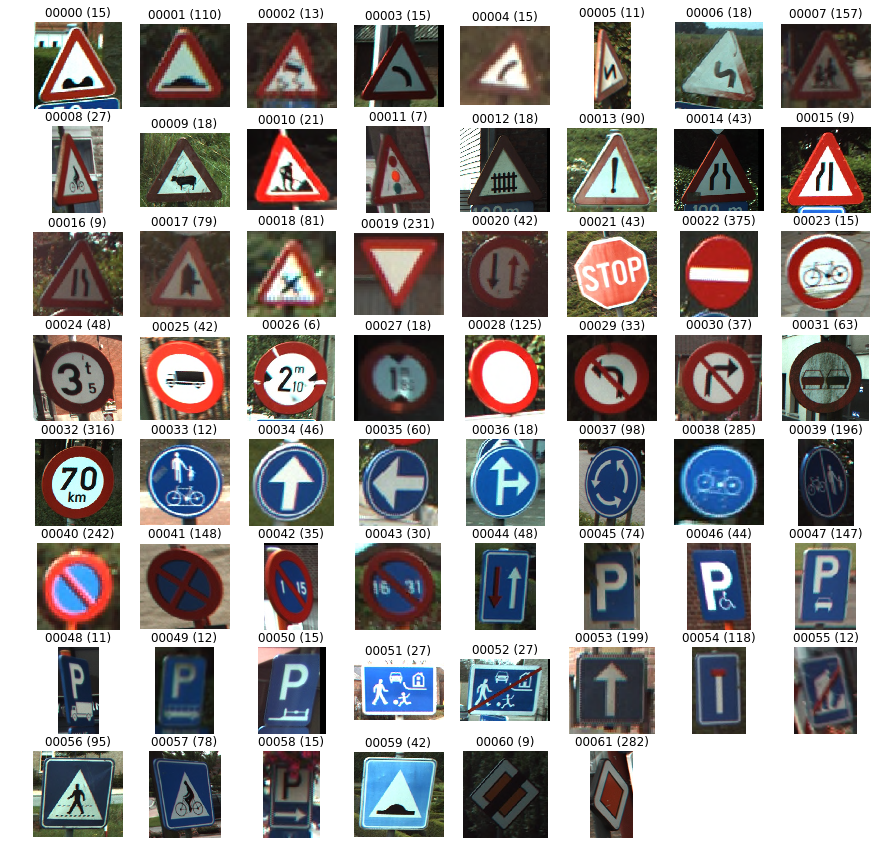

In [26]:
plot_images_and_labels(orig_images, orig_labels)

In [6]:
testing_data = load_testing()

In [7]:
(orig_test_images, orig_test_labels) = split_images_and_labels(testing_data)

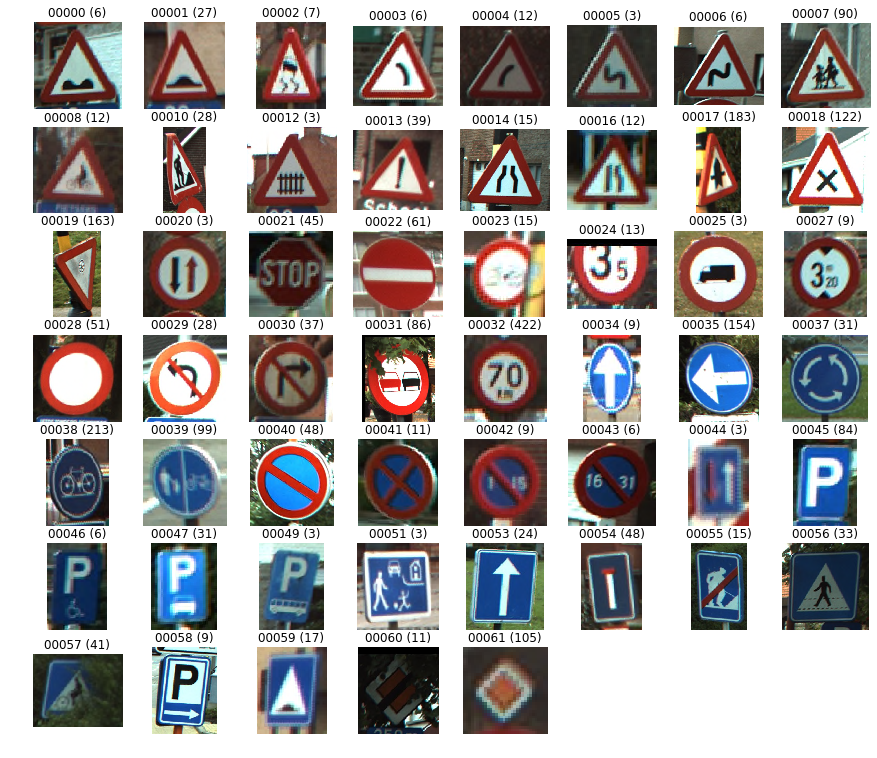

In [8]:
plot_images_and_labels(orig_test_images, orig_test_labels)

In [9]:
full_data = load_full_dataset()

In [10]:
(full_images, full_labels) = split_images_and_labels(full_data)

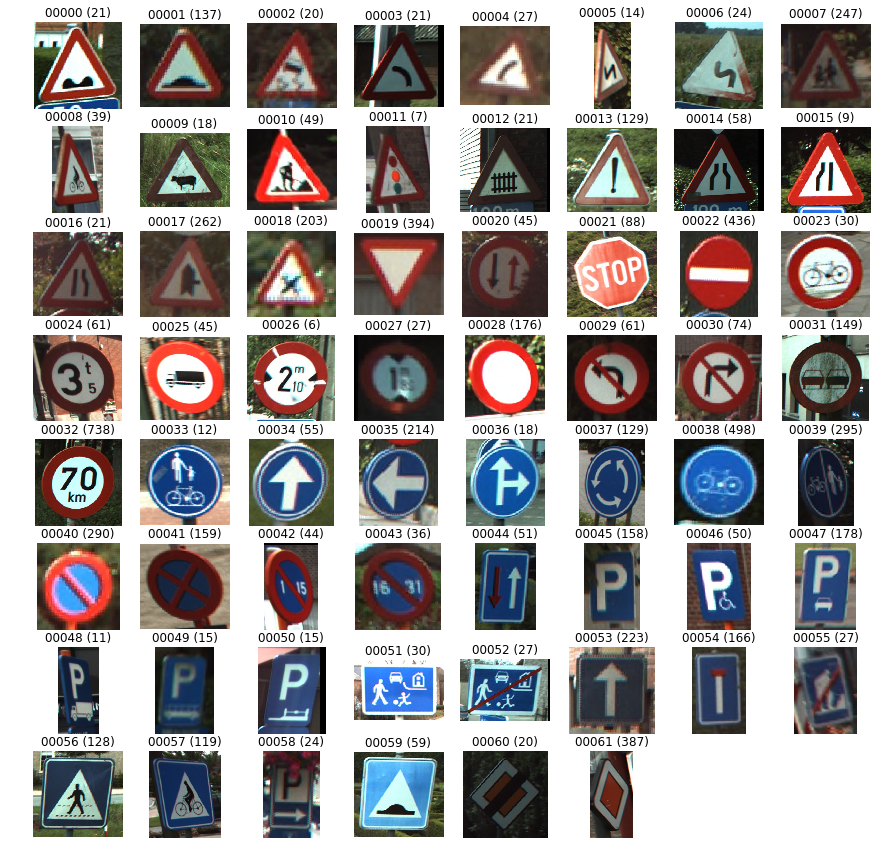

In [11]:
plot_images_and_labels(full_images, full_labels)

In [12]:
# TODO: Create plot_images_with_label()

In [13]:
resized_training_data = resize_images(training_data, size=32)
(resized_images, resized_labels) = split_images_and_labels(resized_training_data)

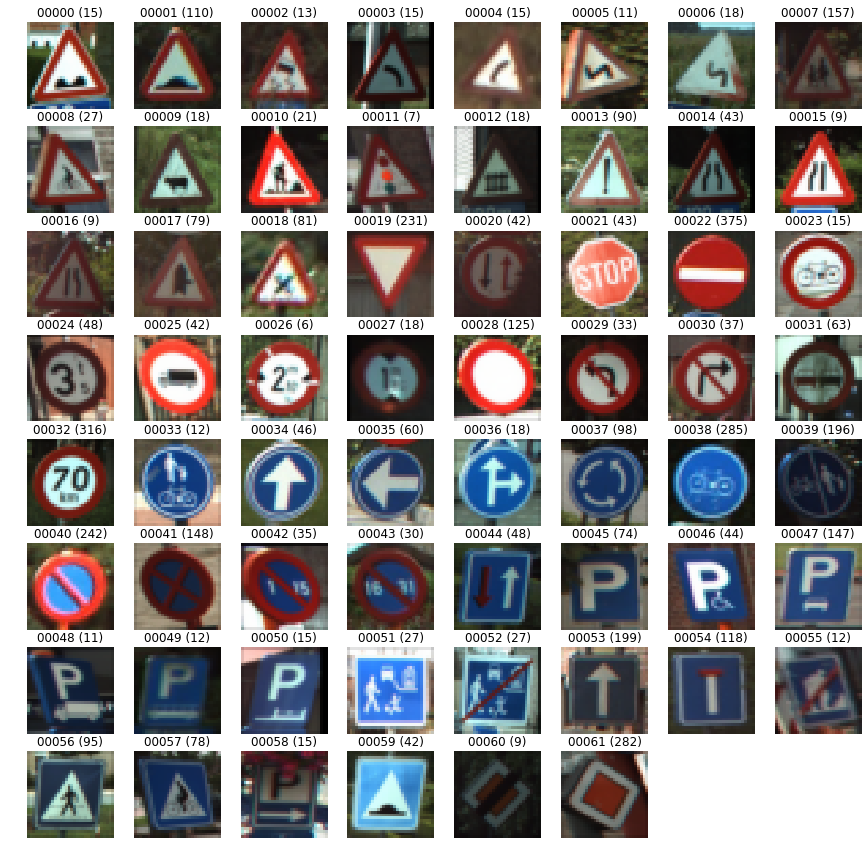

In [14]:
plot_images_and_labels(resized_images, resized_labels)